<a href="https://colab.research.google.com/github/zbirgilii/NeuralNetworksDL/blob/main/zeynepbirgili_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

probabilities = np.array([0.34, 0.21, 0.54, 0.45, 0.60, 0.70, 0.80, 0.95, 0.99])

log_odds = np.log(probabilities / (1 - probabilities))

print(log_odds)

log_likelihood = np.sum(np.log(probabilities))

log_likelihood


[-0.66329422 -1.32492541  0.16034265 -0.2006707   0.40546511  0.84729786
  1.38629436  2.94443898  4.59511985]


-5.206138994538171

In [ ]:
logits = np.array([3.5, 6.1, -2.9, -1.2])
classes = ["bus", "truck", "car", "van"]

exp_logits = np.exp(logits - np.max(logits))
probabilities = exp_logits / np.sum(exp_logits)


df_softmax = pd.DataFrame({
    "Class": classes,
    "Logits": logits,
    "Softmax Probability": probabilities
})

print(df_softmax)

predicted_class = classes[np.argmax(probabilities)]
predicted_class


   Class  Logits  Softmax Probability
0    bus     3.5             0.069087
1  truck     6.1             0.930170
2    car    -2.9             0.000115
3    van    -1.2             0.000628


'truck'

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.2911 - loss: 2.0586 - val_accuracy: 0.6938 - val_loss: 1.3381
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8181 - loss: 1.0337 - val_accuracy: 0.7812 - val_loss: 0.8791
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8937 - loss: 0.5442 - val_accuracy: 0.7625 - val_loss: 0.7878
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9018 - loss: 0.4454 - val_accuracy: 0.8125 - val_loss: 0.7011
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9274 - loss: 0.3310 - val_accuracy: 0.8062 - val_loss: 0.6886
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9564 - loss: 0.2744 - val_accuracy: 0.8000 - val_loss: 0.6628
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9668 - loss: 0.2277 - val_accuracy: 0.8125 - val_loss: 0.6620
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9776 - loss: 0.1844 - val_accuracy: 0.8250 

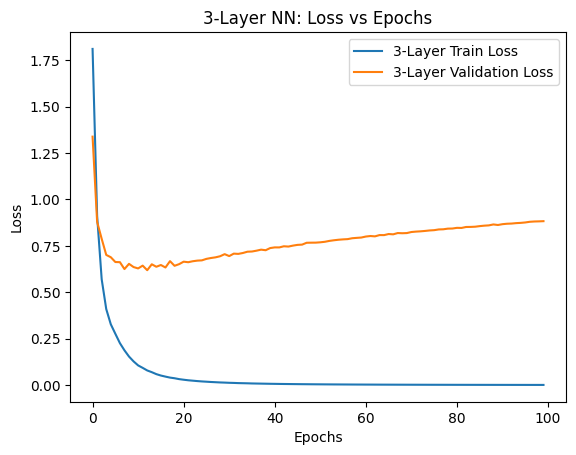

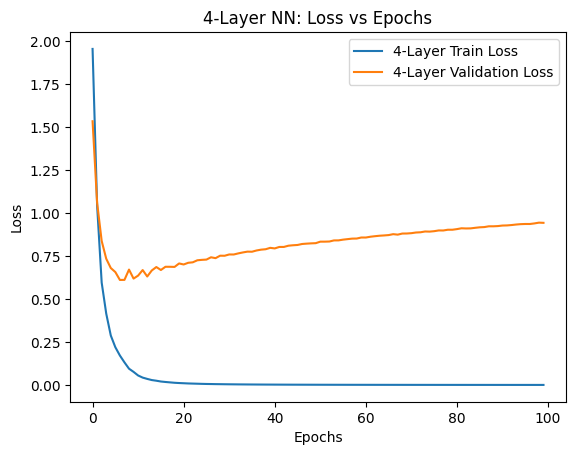

3-Layer NN Test Accuracy: 0.8900
4-Layer NN Test Accuracy: 0.8700


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

df = pd.read_csv('MINST.csv')

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

X = X / 255.0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

model_3_layer = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(10, activation='softmax')
])


model_4_layer = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model_3_layer.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_4_layer.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_3_layer = model_3_layer.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)
history_4_layer = model_4_layer.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

plt.plot(history_3_layer.history['loss'], label='3-Layer Train Loss')
plt.plot(history_3_layer.history['val_loss'], label='3-Layer Validation Loss')
plt.title('3-Layer NN: Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history_4_layer.history['loss'], label='4-Layer Train Loss')
plt.plot(history_4_layer.history['val_loss'], label='4-Layer Validation Loss')
plt.title('4-Layer NN: Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


test_loss_3_layer, test_acc_3_layer = model_3_layer.evaluate(X_test, y_test, verbose=0)
print(f"3-Layer NN Test Accuracy: {test_acc_3_layer:.4f}")

test_loss_4_layer, test_acc_4_layer = model_4_layer.evaluate(X_test, y_test, verbose=0)
print(f"4-Layer NN Test Accuracy: {test_acc_4_layer:.4f}")